# Project: Investigate a Dataset -  ( TMDb movie Database )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I am going to using movies dataset, that analyses it will be around 10000 movies
steps
1 - cleaning data
2 - question 
3 - viualization 
4 - conclusions 

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [81]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

section of clean dataset for analysis.


### General Properties
Let's check the dataset and see what cleaning does it requires.

In [82]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
1- Removeing columns such as 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count' and 'vote_average'.

2-Deleteing the one duplicated row

3-There are lots of movies where the budget or revenue have a value of '0' so need to discard this rows.

4- The 'release_date' column must be converted into date format

5-Convert budget and revenue column to int datatype.

6-Replace runtime value of 0 to NAN, Since it will affect the result

In [84]:
# Columns that needs to be deleted
drop_columns = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count', 'vote_average']
# Drop the columns from the database
df.drop(drop_columns, axis=1, inplace=True)
# Lets look at the new dataset
df.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015


In [85]:
# Store rows and columns using shape function.
rows, col = df.shape
#since rows includes count of a header, we need to remove its count.
print('We have {} total rows and {} columns.'.format(rows-1, col))

We have 10865 total rows and 8 columns.


In [86]:
# Drop duplicate rows but keep the first one
df.drop_duplicates(keep = 'first', inplace = True)
# Store rows and columns using shape function.
rows, col = df.shape
print('Now we have {} total rows and {} columns.'.format(rows-1, col))

Now we have 10864 total rows and 8 columns.


In [87]:
#Columns that need to be checked.
columns = ['budget', 'revenue']
# Replace 0 with NAN
df[columns] = df[columns].replace(0, np.NaN)
# Drop rows which contains NAN
df.dropna(subset = columns, inplace = True)
rows, col = df.shape
print('We now have only {} rows.'.format(rows-1))

We now have only 3853 rows.


In [88]:
# Convert column release_date to DateTime
df.release_date = pd.to_datetime(df['release_date'])
# Lets look at the new dataset
df.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


In [89]:
# Columns to convert datatype of
columns = ['budget', 'revenue']
# Convert budget and revenue column to int datatype
df[columns] = df[columns].applymap(np.int64)
# Lets look at the new datatype
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [90]:
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [91]:
# Replace runtime value of 0 to NAN, Since it will affect the result.
df['runtime'] = df['runtime'].replace(0, np.NaN)
# Check the stats of dataset
df.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [92]:
df['revenue'] = df['revenue'].replace(0, np.NaN)
# Check the stats of dataset
df.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [93]:
df['budget'] = df['budget'].replace(0, np.NaN)
# Check the stats of dataset
df.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> I am going to Compute statistics and create visualizations** with the goal of addressing the research questions.


#### Research Question 1 (What was the most movie had maximum revenue  ?)

In [94]:
# Movie with highest revenue
df.loc[df['revenue'].idxmax()]


budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
Name: 1386, dtype: object

#### Research Question 1.1 (What was the most movie had minimum ?)

In [95]:
# Movie with lowest revenue
df.loc[df['revenue'].idxmin()]


budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
release_year                                                   2003
Name: 5067, dtype: object

#### Research Question 1.2 (What was the most movie had higher runtime ?)

In [96]:
# Movie with greatest runtime
df.loc[df['runtime'].idxmax()]

budget                                                     18000000
revenue                                                      871279
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
Name: 2107, dtype: object

#### Research Question 1.3 (What was the most movie had latest runtime ?)

In [97]:
# Movie with least runtime
df.loc[df['runtime'].idxmin()]

budget                                                           10
revenue                                                           5
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
runtime                                                          15
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
release_year                                                   2003
Name: 5162, dtype: object

#### Research Question 1.4 (What was the most movie average runtime ?)

In [101]:
# Average runtime of movies
df['runtime'].mean()

109.22029060716139

#### The average runtime of all movies was 109.22 minutes
#### let us visualize it by histogram 

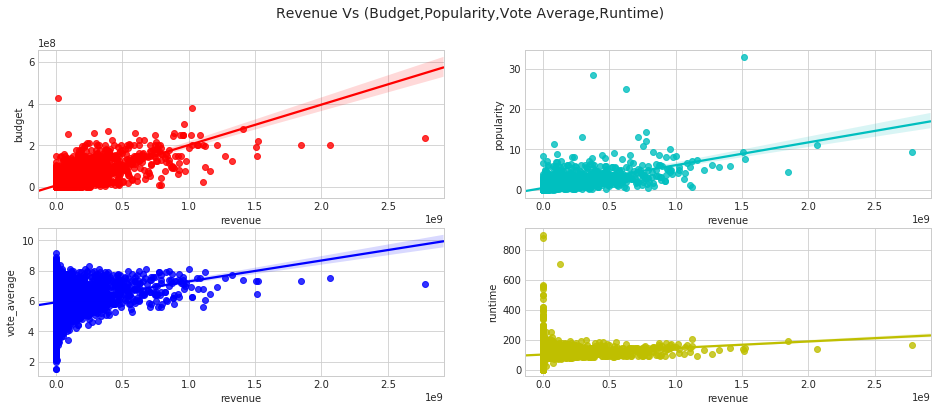

In [110]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
#info.plot(x = ['revenue'],y = ['budget'],kind = "scatter",ax = axes[0][0])
sns.regplot(x=df['revenue'], y=df['budget'],color='r',ax=axes[0][0])
sns.regplot(x=df['revenue'], y=df['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=df['revenue'], y=df['vote_average'],color='b',ax=axes[1][0])
sns.regplot(x=df['revenue'], y=df['runtime'],color='y',ax=axes[1][1])
#axes.scatter(info['revenue'],info['vote_average'])
sns.set_style("whitegrid")

#### Most of the movie are in the range of 100 minutes to 120 minutes.

#### let us relation between the Runtime and Revenue

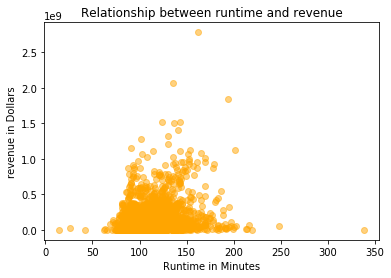

In [22]:
# Titles of the histogram
plt.xlabel('Runtime in Minutes'), plt.ylabel('revenue in Dollars'), plt.title('Relationship between runtime and revenue')
plt.scatter(df['runtime'], df['revenue'], alpha=0.5, color= 'orange')
plt.show()

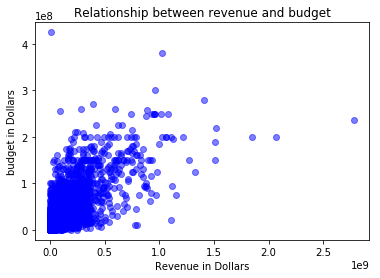

In [23]:
# Titles of the histogram
plt.xlabel('Revenue in Dollars'), plt.ylabel('budget in Dollars'), plt.title('Relationship between revenue and budget')
plt.scatter(df['revenue'], df['budget'], alpha=0.5, color= 'blue')
plt.show()

### Research Question 2 ( What is the movies making more then 100M Dollars?)

In [24]:
# Dataframe which has data of movies which made profit of more the 100 M Dollars.
high_revenue = df[df['revenue'] >= 100000000]
# Reindexing the dataframe
high_revenue.index = range(len(high_revenue))
#showing the dataset
high_revenue.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


#### We can see that we have the top five movies which has revenue more then 100000000M Dollars (Jurassic World, Mad Max: Fury Road,Insurgent, Star Wars: The Force Awakens,Furious )  

In [25]:
# Average budget of movies
high_revenue['budget'].mean()

71971828.790717304

#### The average revenue was 280915023.82 $

In [26]:
# Average revenue of movies
high_revenue['revenue'].mean()

280915023.82953584

#### The runtime revenue was 114.99 minutes

In [27]:
# Average runtime of movies
high_revenue['runtime'].mean()

114.99915611814346

In [28]:
# Printing the info of the new dataframe
high_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 8 columns):
budget            1185 non-null int64
revenue           1185 non-null int64
original_title    1185 non-null object
cast              1185 non-null object
runtime           1185 non-null int64
genres            1185 non-null object
release_date      1185 non-null object
release_year      1185 non-null int64
dtypes: int64(4), object(4)
memory usage: 74.1+ KB


#### We can see that we have 1185 movies which has revenue more then 100000000M Dollars.

### Research Question 2.1 ( What kind of movies making more then 100M Dollars?)

In [28]:
# which type movies
genres_count = pd.Series(high_revenue['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Action             445
Comedy             432
Drama              404
Adventure          382
Thriller           344
Family             228
Science Fiction    209
Fantasy            204
Romance            182
Crime              173
Animation          126
Mystery             99
Horror              85
War                 42
Music               41
History             34
Western             18
Documentary          2
dtype: int64

#### Which are the successfull genres  of movies making more then 100 M Dollars?
Lets visualize this with a plot)

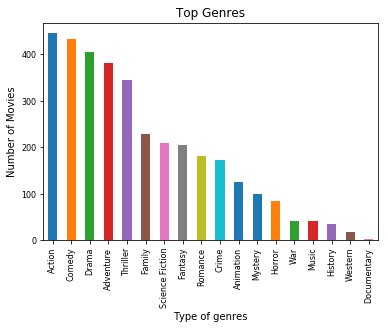

In [29]:
# Initialize the plot
diagram = genres_count.plot.bar(fontsize = 8)
# Set a title
diagram.set(title = 'Top Genres')
# x-label and y-label
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Number of Movies')
# Show the plot
plt.show()

### Research Question 2.2 ( What are highest budget movies?

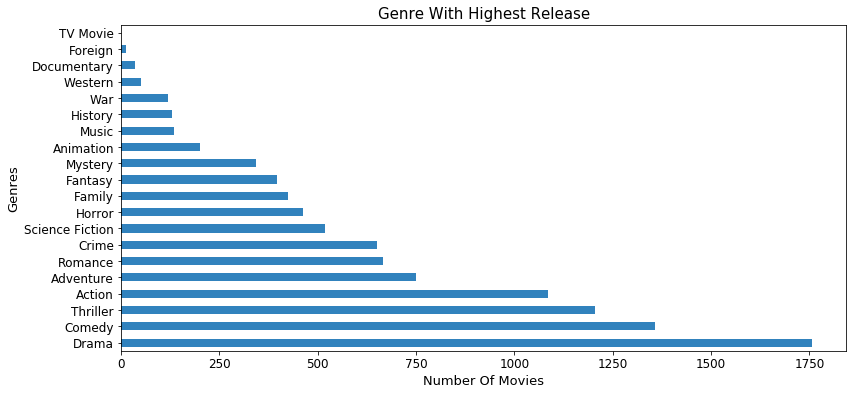

In [28]:
# top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")


### Research Question 2.3 ( What the most actors had highr revenue

In [43]:
# This will first actors had makinig more movies
cast_count = pd.Series(df['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Sylvester Stallone    34
Tom Hanks             34
Harrison Ford         34
Morgan Freeman        34
Brad Pitt             34
Tom Cruise            33
Denzel Washington     32
Eddie Murphy          32
Liam Neeson           31
Owen Wilson           30
Julianne Moore        30
Mark Wahlberg         29
Gene Hackman          29
Willem Dafoe          29
dtype: int64

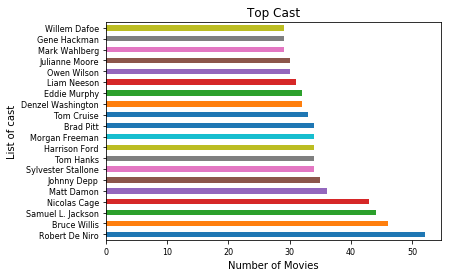

In [44]:
# Initialize the plot
diagram = cast_count.head(20).plot.barh(fontsize = 8)
# titles
diagram.set(title = 'Top Cast'), diagram.set_xlabel('Number of Movies'), diagram.set_ylabel('List of cast')
plt.show()

<a id='conclusions'></a>
## Conclusions


The final decision if we want making new movies let consider as following results:

1.1 The average revenue of the movies will be arround 280915023.83 Dollars

1.2 The average budget of the movies can be arround 71971828 Dollars

1.3 The average runtime of the movies can be arround 114.9 Minutes

2.1 The Top 10 Genres we should focus on should be Action, Drama, Comedy, Adventure , Thriller, Family, Scince Fiction Romance, Fantasy, Crime. 

2.2 The Top 5 cast we should focus on should be Willis Dafoe, Gene Hackman, mark wahlberg, julianna Moore, Owen Wilson



<a id='conclusions'></a>
# limitations 
##### Is the data provided by the dataset sufficient to answer your question?
##### I think we need to gather data from different sources, and we need to be updated if we want to create a new movie, couldn't guarantee 100 % is going to work But we have high probability of making high profits if we had similar
#### Is the size of the dataset is sufficient to give a good judgement about the questions you asked?
#### i will say yes it would be more to have good judgement about most kind of movies are going to be succeed if we follow those steps
#### What are the major difficulties you encountered in the dataset while performing the analysis?
#### There are many that have to be taken care of such as an influantial factor that would lead to different results

#### it gives people high expectations from this movie. This was just one 
#### example of an influantial factor that would lead to different results, there are
#### many that have to be taken care of.
#### Is dropping lines from the dataset was an issue affecting accuracy of the analysis?
#### dropping lines from the dataset was affecting accuracy but is not too much 
##### Is it sufficient to decide on existing correlations between variables just by looking at scatter plots, or a statistical hypothesis testing is needed?
#### I will say yes if we look at scatter plots, or a statistical we can have a look about important issue such like budget, revenue, runtime, top rated, kind of movies making more revenue and so on

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0